In [ ]:
!ls

sample_data


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Student_Performance.csv to Student_Performance.csv


In [ ]:
import pandas as pd
import joblib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import tensorflow as tf
import seaborn as sns

In [ ]:
sns.set_style("whitegrid")
sns.set_palette("RdBu")

In [ ]:
data = pd.read_csv("Student_Performance.csv")

In [ ]:
data.head()

,hours_studied,previous_scores,extracurricular_activities,sleep_hours,sample_question_papers_practiced,performance_index
0,7,99,Yes,9,1,91
1,4,82,No,4,2,65
2,8,51,Yes,7,2,45
3,5,52,Yes,5,2,36
4,7,75,No,8,5,66


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   hours_studied                     10000 non-null  int64 
 1   previous_scores                   10000 non-null  int64 
 2   extracurricular_activities        10000 non-null  object
 3   sleep_hours                       10000 non-null  int64 
 4   sample_question_papers_practiced  10000 non-null  int64 
 5   performance_index                 10000 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 468.9+ KB


In [ ]:
data.isna().sum() / data.shape[0]

,0
hours_studied,0.0
previous_scores,0.0
extracurricular_activities,0.0
sleep_hours,0.0
sample_question_papers_practiced,0.0
performance_index,0.0


In [ ]:
data.shape

(10000, 6)

In [ ]:
data.duplicated().any()

np.True_

In [ ]:
data.describe()

,hours_studied,previous_scores,sleep_hours,sample_question_papers_practiced,performance_index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [ ]:
data.describe(include = object)

,extracurricular_activities
count,10000
unique,2
top,No
freq,5052


In [ ]:
def count_plot(column_name, hue = None, rotation = 0):
    """
    1) input : column name, column data type must be object or categorical
    3) output : cout plot using seaborn modules, unique values in x-axis and frequency in y-axis
    4) i use bar_label to show frequency of each unique values above each column in graph
    """
    graph = sns.countplot(x = column_name, data = data, hue = hue, order = data[column_name].value_counts().index)
    for container in graph.containers:
        graph.bar_label(container)


    plt.xticks(rotation = rotation)
    plt.show()

In [ ]:
def box_plot(x_axis = None, y_axis = None, hue = None, col = None):
    """
    input : x_axis, y_axis and hue column, column data type must be numeric in y_axis
    output : box plot to see distribution of column values such as min,max,mean,medien,std
    """
    sns.catplot(x = x_axis, y = y_axis, data = data, hue = hue, kind = "box", col = col)
    plt.xlabel(x_axis)
    plt.ylabel("FRQ")
    plt.show()

In [ ]:
data["hours_studied"].unique()

array([7, 4, 8, 5, 3, 6, 2, 1, 9])

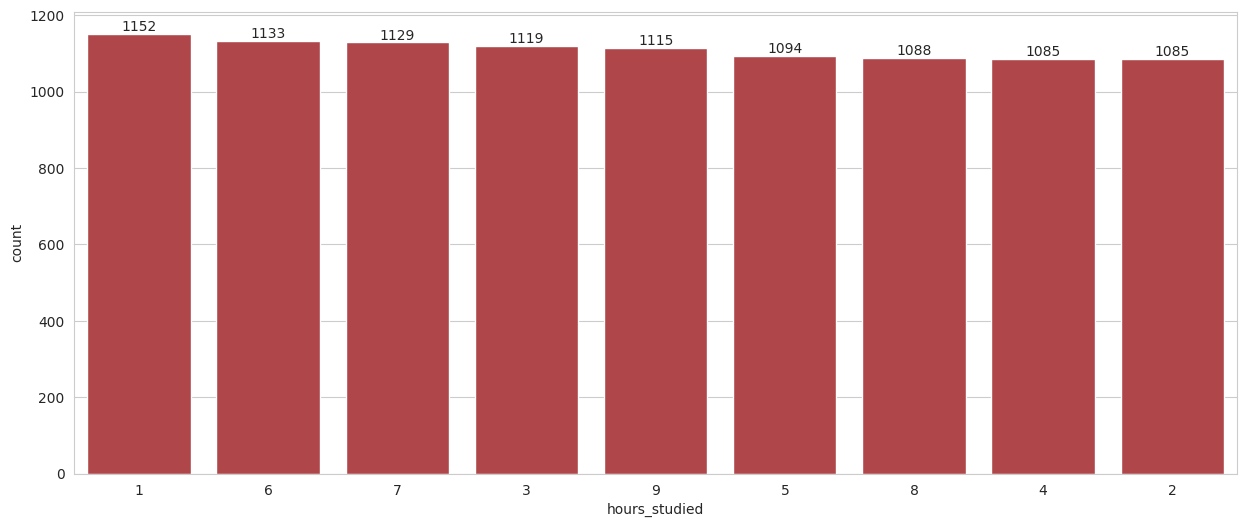

In [ ]:
plt.figure(figsize = (15,6))
count_plot(column_name = "hours_studied")

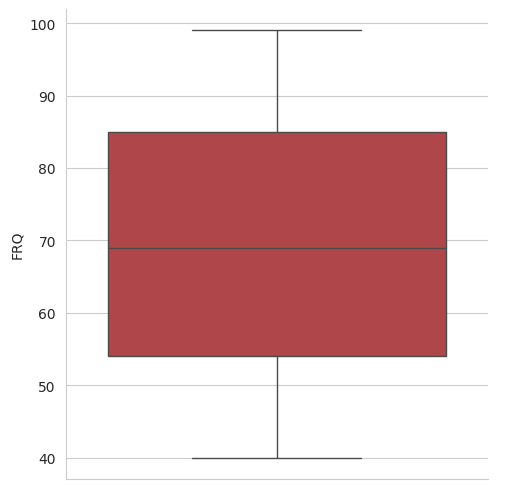

In [ ]:
box_plot(y_axis = "previous_scores")

In [ ]:
data["extracurricular_activities"].unique()

array(['Yes', 'No'], dtype=object)

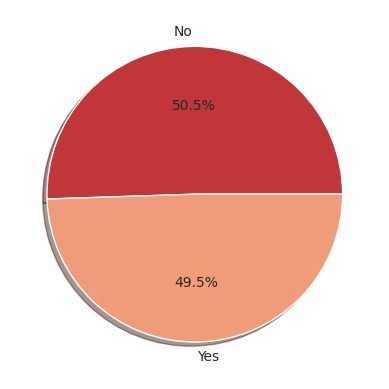

In [ ]:
plt.pie(
    data["extracurricular_activities"].value_counts(),
    labels = data["extracurricular_activities"].value_counts().index,
    shadow = True, autopct = "%1.1f%%"
    )
plt.show()

In [ ]:
data["sleep_hours"].unique()

array([9, 4, 7, 5, 8, 6])

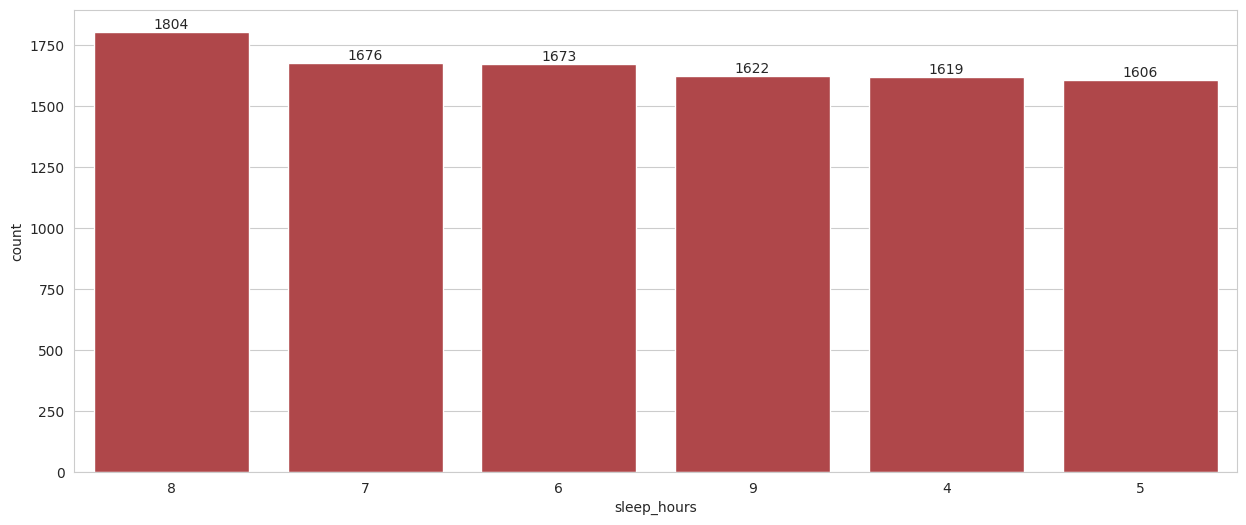

In [ ]:
plt.figure(figsize = (15,6))

count_plot(column_name = "sleep_hours")

In [ ]:
data["sample_question_papers_practiced"].unique()

array([1, 2, 5, 6, 0, 8, 3, 4, 9, 7])

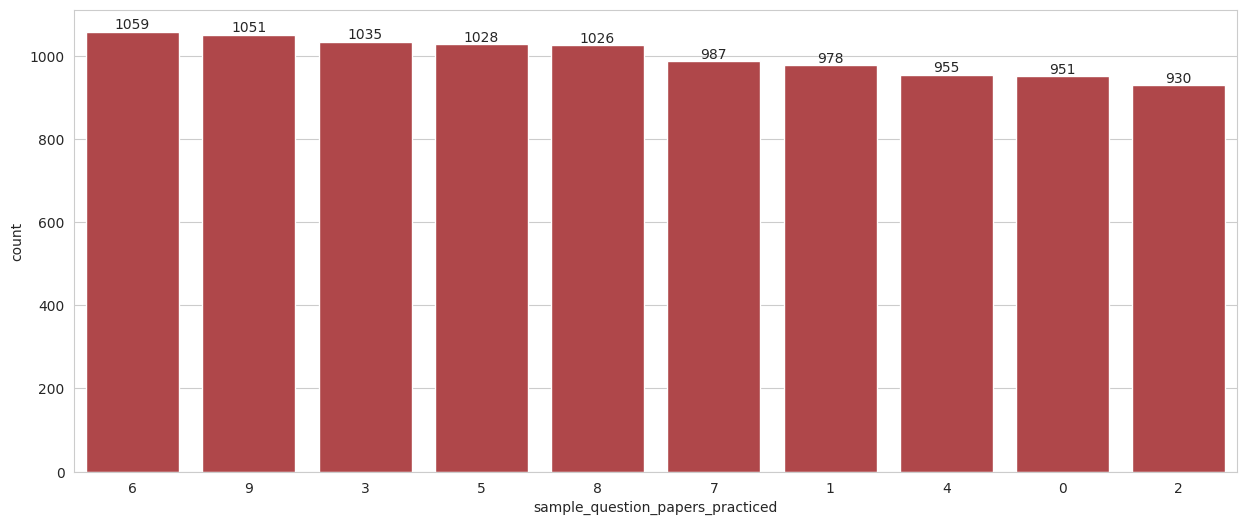

In [ ]:
plt.figure(figsize = (15,6))

count_plot(column_name = "sample_question_papers_practiced")

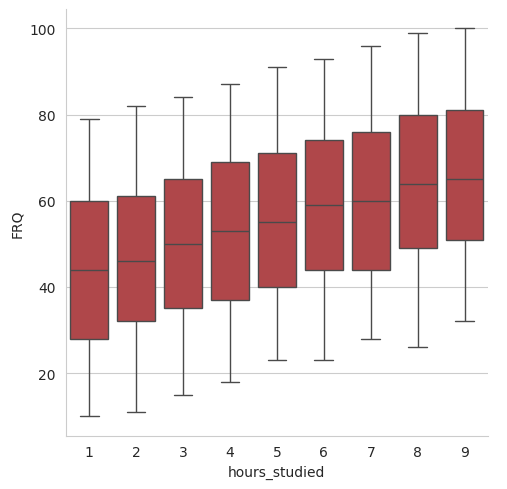

In [ ]:
box_plot(x_axis = "hours_studied", y_axis = "performance_index")

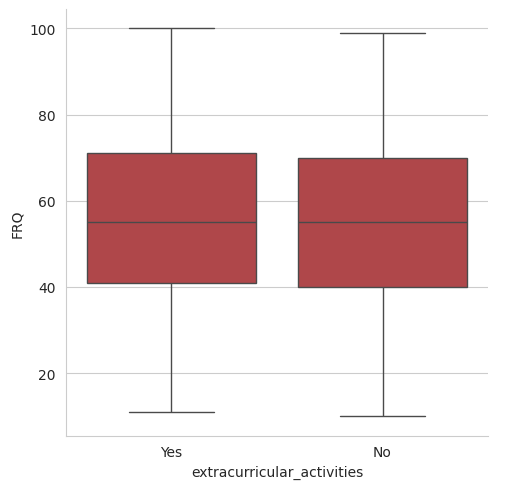

In [ ]:
box_plot(x_axis = "extracurricular_activities", y_axis = "performance_index")

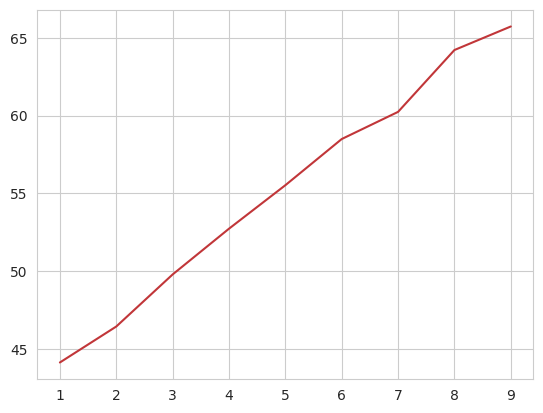

In [ ]:
avg_performance_by_hours = data.groupby('hours_studied')['performance_index'].mean()
plt.plot(avg_performance_by_hours.index, avg_performance_by_hours.values)
plt.show()

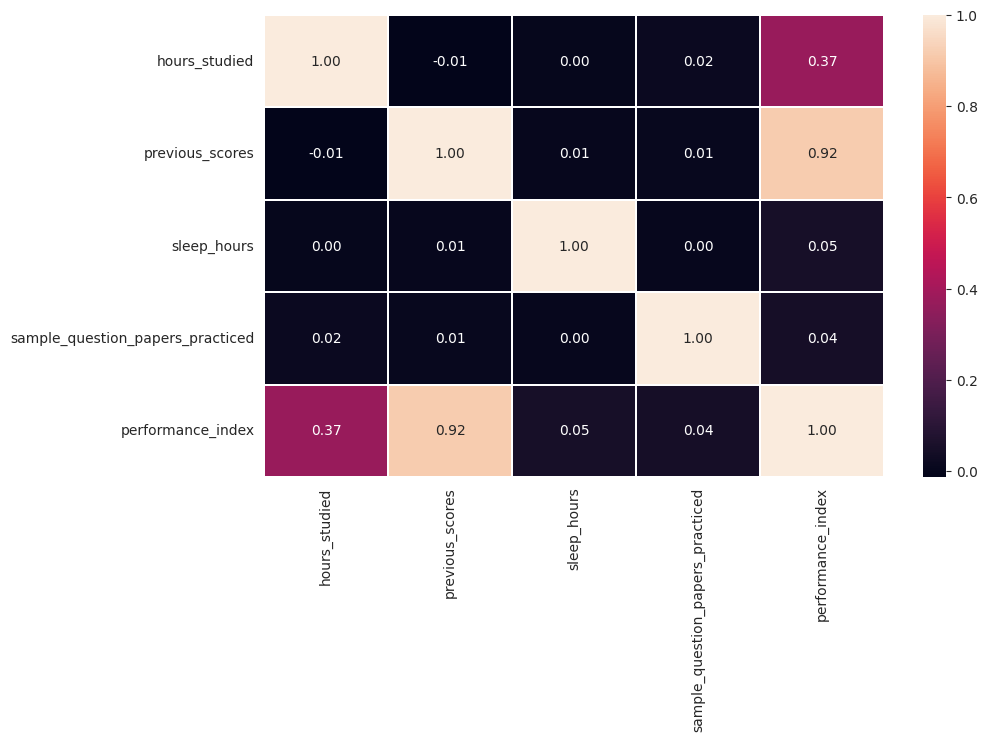

In [ ]:
plt.figure(figsize = (10,6))
sns.heatmap(data.select_dtypes(exclude = object).corr(), annot = True, fmt = ".2f", linewidths = 0.2)
plt.show()

In [ ]:
data["extracurricular_activities"] = LabelEncoder().fit_transform(data["extracurricular_activities"])

x = data.drop(columns=["performance_index"])
y = data["performance_index"]

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
joblib.dump(scaler, "scaler.save")

x_train, x_test, y_train, y_test = train_test_split(
    x_scaled, y, test_size=0.2, random_state=42
)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(x.shape[1],)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(
    x_train, y_train,
    epochs=100,
    batch_size=4,
    validation_data=(x_test, y_test),
    verbose=1
)

Epoch 1/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 2885.6819 - mae: 50.4794 - val_loss: 652.9493 - val_mae: 24.3066
Epoch 2/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 317.4739 - mae: 15.5146 - val_loss: 16.1138 - val_mae: 3.1671
Epoch 3/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 15.3941 - mae: 3.0750 - val_loss: 10.3395 - val_mae: 2.4150
Epoch 4/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 9.1121 - mae: 2.3322 - val_loss: 6.7935 - val_mae: 1.9999
Epoch 5/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 6.2703 - mae: 1.9336 - val_loss: 5.3266 - val_mae: 1.8052
Epoch 6/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 5.1263 - mae: 1.7751 - val_loss: 4.8929 - val_mae: 1.7360
Epoch 7/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 4.8297 - mae: 1.7383 - val_loss: 4.5240 - val_mae: 1.6811
Epoch 8/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 4.5469 - mae: 1.6795 - val_loss: 4.4672 - val_mae: 1.6661
Epoch 9/100
2000

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Test MAE: 1.6296
Test MSE: 4.1973
Test RMSE: 2.0487
R² Score: 0.9887


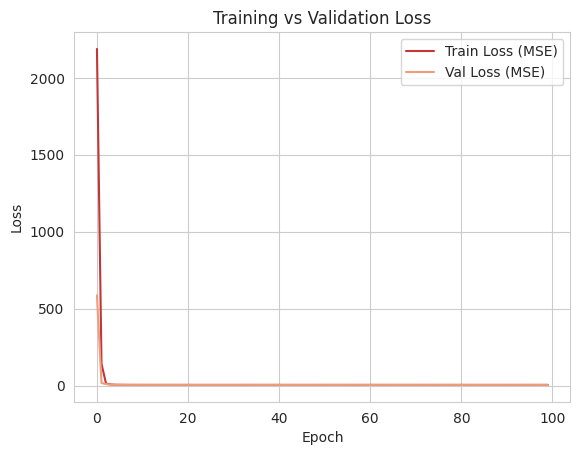

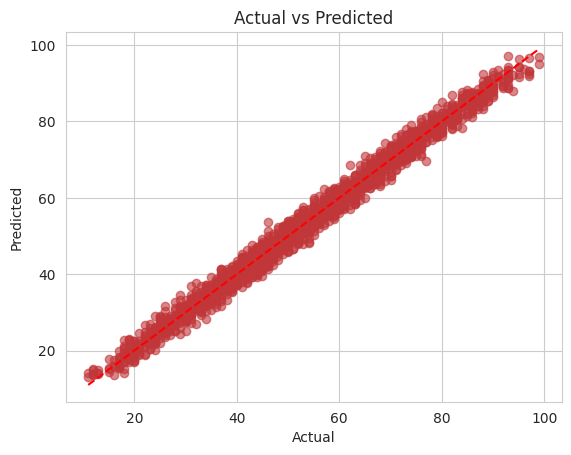

In [ ]:
y_pred = model.predict(x_test).flatten()

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print(f"\nTest MAE: {history.history['val_mae'][-1]:.4f}")
print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

plt.plot(history.history['loss'], label='Train Loss (MSE)')
plt.plot(history.history['val_loss'], label='Val Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()


model.save("student_regression_dl.h5")

In [ ]:
weights, bias = model.layers[0].get_weights()

for name, w in zip(x.columns, weights.flatten()):
    print(f"{name} * {w:.4f}")
print(f"bias = {bias[0]:.4f}")


hours_studied * -0.8299
previous_scores * 0.5258
extracurricular_activities * 0.7343
sleep_hours * -0.5962
sample_question_papers_practiced * 0.8096
bias = -1.5590


In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open("student_regression_dl.tflite", "wb") as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmp06wf4vf0'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 5), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  137824769849872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137824769849488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137824735135312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137824735135696: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
from google.colab import files
files.download("student_regression_dl.tflite")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>